# Libraries

In [1]:
# libraries
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots
import seaborn as sns
import joblib

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

import warnings
warnings.filterwarnings(action="ignore")

# Data set

In [2]:
# get dataset
train = joblib.load("patient.pkl")

display(train.shape)
train.head(5)

(558211, 56)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,IsOutpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,0,1913-12-01,NaT,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,0,1922-10-01,NaT,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,0,1930-07-01,NaT,0,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,Yes


# EDA

In [3]:
inpatient = train['AdmissionDt'].notnull()
outpatient = train['AdmissionDt'].isna()

fraudulent = train['PotentialFraud'].eq('Yes')
genuine = train['PotentialFraud'].eq('No')

In [4]:
# Function for transforming dataframe, which will be used for plotting
def transform_df(agg_col, agg_func, new_colname):
    new_dfname = train.groupby(['PotentialFraud','IsOutpatient','Provider'])[[agg_col]].agg(agg_func)
    new_dfname.columns.values[0] = new_colname
    new_dfname = new_dfname.reset_index()
    return new_dfname

In [5]:
# Function for creating boxplots grouped by in/out patients and fraudulent providers
def create_boxplot(df, column, title1, title2):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sns.boxplot(data = df[(df['IsOutpatient'] == 0)], 
                x = column, y = 'PotentialFraud', ax = ax[0], fliersize= 1);
    sns.boxplot(data = df[(df['IsOutpatient'] == 1)], 
                x = column, y = 'PotentialFraud', ax = ax[1], fliersize= 1);
    ax[0].set_title(title1);
    ax[1].set_title(title2);

<b> Count the number of medical doctors in the train outpatient and inpatient dataset

In [6]:
print('Number of total medical doctors: ', 
      train['AttendingPhysician'].nunique())
print('-'*50)

print('Number of AttendingPhysician in inpatient dataset: ', 
      train[inpatient]['AttendingPhysician'].nunique())
print('Number of AttendingPhysician in outpatient dataset: ', 
      train[outpatient]['AttendingPhysician'].nunique())
print('-'*50)

print('Number of OperatingPhysician in inpatient dataset: ', 
      train[inpatient]['OperatingPhysician'].nunique())
print('Number of OperatingPhysician in outpatient dataset: ', 
      train[outpatient]['OperatingPhysician'].nunique())
print('-'*50)

print('Number of OtherPhysician in inpatient dataset: ', 
      train[inpatient]['OtherPhysician'].nunique())
print('Number of OtherPhysician in outpatient dataset: ', 
      train[outpatient]['OtherPhysician'].nunique())

Number of total medical doctors:  82063
--------------------------------------------------
Number of AttendingPhysician in inpatient dataset:  11604
Number of AttendingPhysician in outpatient dataset:  74109
--------------------------------------------------
Number of OperatingPhysician in inpatient dataset:  8287
Number of OperatingPhysician in outpatient dataset:  28532
--------------------------------------------------
Number of OtherPhysician in inpatient dataset:  2877
Number of OtherPhysician in outpatient dataset:  44388


<b>Analysing if inpatient claims with same physicians are more suitable to frauds.

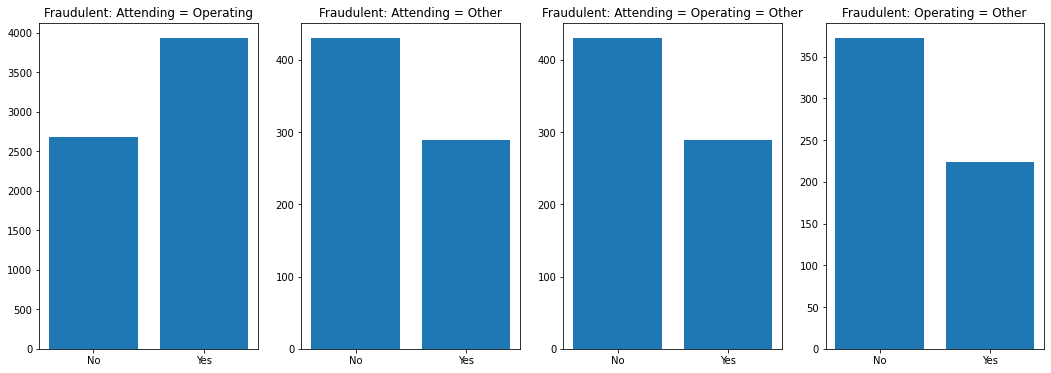

In [7]:
attendingOperating = train[inpatient][train['AttendingPhysician'] == train['OperatingPhysician']].groupby(
    'PotentialFraud', as_index=False)['AttendingPhysician'].count()

attendingOther = train[inpatient][train['AttendingPhysician'] == train['OtherPhysician']].groupby(
    'PotentialFraud', as_index=False)['AttendingPhysician'].count()

attendingOperatingOther = train[inpatient][(train['AttendingPhysician'] == train['OtherPhysician']) & 
                                          (train['AttendingPhysician'] == train['OtherPhysician'])].groupby(
    'PotentialFraud', as_index=False)['AttendingPhysician'].count()

operatingOther = train[inpatient][train['OperatingPhysician'] == train['OtherPhysician']].groupby(
    'PotentialFraud', as_index=False)['OperatingPhysician'].count()



fig, axs = plt.subplots(1, 4, figsize=(18,6))
axs[0].bar(attendingOperating['PotentialFraud'], attendingOperating['AttendingPhysician']);
axs[0].set_title('Fraudulent: Attending = Operating')
axs[1].bar(attendingOther['PotentialFraud'], attendingOther['AttendingPhysician']);
axs[1].set_title('Fraudulent: Attending = Other')
axs[2].bar(attendingOperatingOther['PotentialFraud'], attendingOperatingOther['AttendingPhysician']);
axs[2].set_title('Fraudulent: Attending = Operating = Other')
axs[3].bar(operatingOther['PotentialFraud'], operatingOther['OperatingPhysician']);
axs[3].set_title('Fraudulent: Operating = Other');

It can be a good idea to add a feature engineering column for when the attending physician is the same as the opearting physician given that it seems to have a relation with fraud claims.

<b>Let's analyze if inpatient or outpatient tend to have more chronic conditionals.

In [8]:
print('Number of chronic conditions in inpatient dataset: ', 
      np.sum(train[train['AdmissionDt'].notnull()].filter(regex='ChronicCond').eq(1).sum()))
print('Number of chronic conditions in outpatient dataset: ', 
      np.sum(train[train['AdmissionDt'].isna()].filter(regex='ChronicCond').eq(0).sum()))

Number of chronic conditions in inpatient dataset:  224245
Number of chronic conditions in outpatient dataset:  3408175


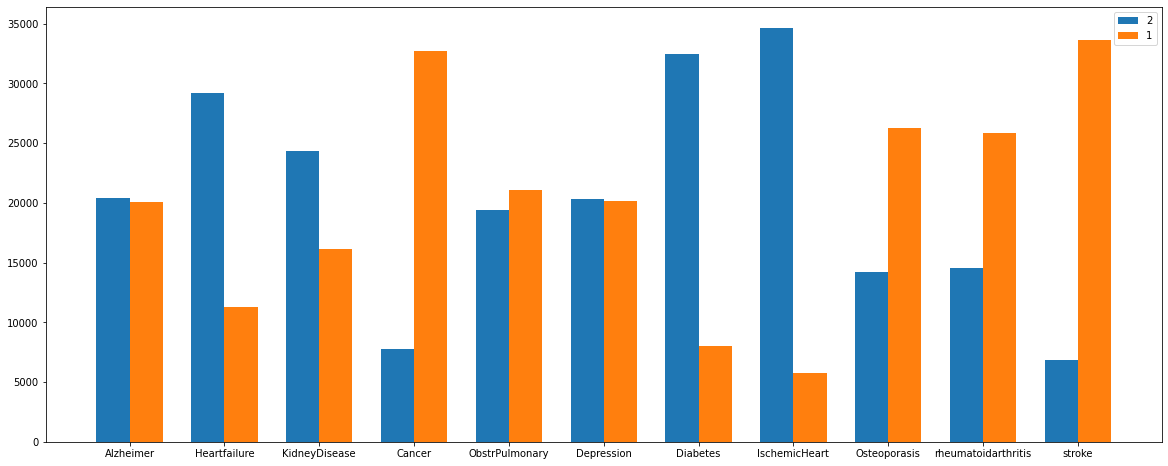

In [9]:
inpatientChronicCount = train[inpatient].filter(regex='ChronicCond').eq(1).sum().reset_index()
inpatientChronicCount['condition'] = inpatientChronicCount['index'].str.split('_').str[1]
inpatientChronicCount['one'] = len(train[inpatient]) - inpatientChronicCount[0]

x = np.arange(len(inpatientChronicCount['condition']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,8))
rects1 = ax.bar(x - width/2, inpatientChronicCount[0], width, label='2')
rects2 = ax.bar(x + width/2, inpatientChronicCount['one'], width, label='1')
ax.set_xticks(x)
ax.set_xticklabels(list(inpatientChronicCount['condition']))
ax.legend()

plt.show()

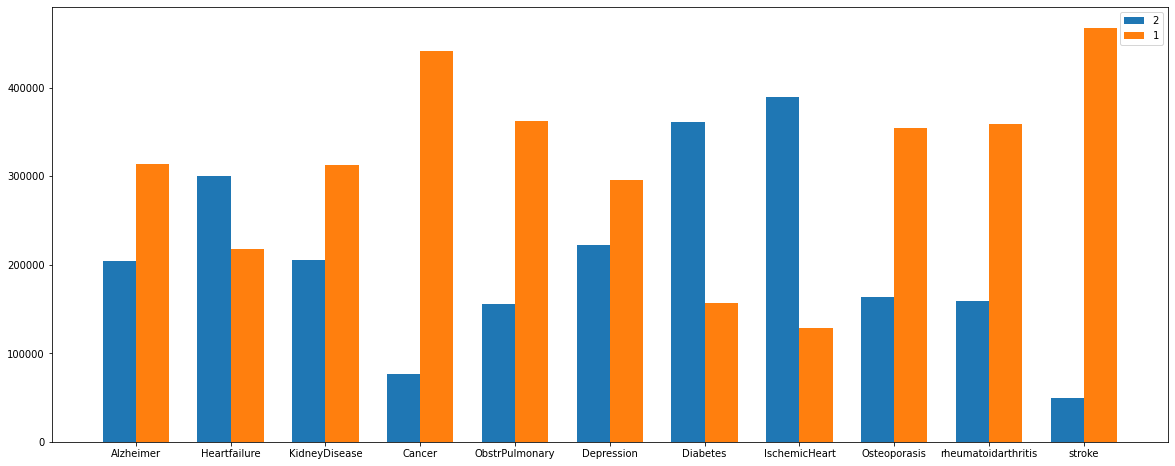

In [10]:
outpatientChronicCount = train[outpatient].filter(regex='ChronicCond').eq(1).sum().reset_index()
outpatientChronicCount['condition'] = outpatientChronicCount['index'].str.split('_').str[1]
outpatientChronicCount['one'] = len(train[outpatient]) - outpatientChronicCount[0]

x = np.arange(len(outpatientChronicCount['condition']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,8))
rects1 = ax.bar(x - width/2, outpatientChronicCount[0], width, label='2')
rects2 = ax.bar(x + width/2, outpatientChronicCount['one'], width, label='1')
ax.set_xticks(x)
ax.set_xticklabels(list(outpatientChronicCount['condition']))
ax.legend()

plt.show()

<b>Checking how many distinct patients (BeneIDs) there are in the in/out-patient datasets

In [11]:
print('Number of distinct BeneIDs in inpatient dataset: ', 
      train[inpatient]['BeneID'].nunique())
print('Number of distinct BeneIDs in outpatient dataset: ', 
      train[outpatient]['BeneID'].nunique())

Number of distinct BeneIDs in inpatient dataset:  31289
Number of distinct BeneIDs in outpatient dataset:  133980


<b> BeneID with the most fraud?

In [12]:
a = pd.DataFrame(train[fraudulent].groupby(
    ['BeneID'], as_index=False)['PotentialFraud'].count())

b = pd.DataFrame(train.value_counts(['BeneID']).reset_index(name='TotalClaimCount'))

pd.merge(a,b,on='BeneID').nlargest(10, 'PotentialFraud')

,BeneID,PotentialFraud,TotalClaimCount
10812,BENE118316,28,29
26429,BENE143400,27,27
15918,BENE126421,24,26
6454,BENE111306,23,25
60830,BENE59303,23,29
64729,BENE66093,23,25
18147,BENE130030,22,24
48883,BENE38076,22,23
53425,BENE46215,22,23
55763,BENE50335,22,22


Not really sure if this can used as a feature engineering but interesting to see that some BeneIDs claims have a lot of frauds. Some BeneIDs are even 100% fraudulents in this dataset. Maybe worth investigating

<b> States (or county) with most frauds?

In [13]:
c = pd.DataFrame(train[fraudulent].groupby(
    ['State'], as_index=False)['PotentialFraud'].count())

d = pd.DataFrame(train.value_counts(['State']).reset_index(name='StateTotalClaims'))

pd.merge(c,d,on='State').nlargest(10, 'PotentialFraud')

# group by state and provider

,State,PotentialFraud,StateTotalClaims
4,5,30335,51350
9,10,17512,39073
32,33,17492,35024
38,39,11448,24251
43,45,10135,34022
30,31,9112,15940
46,49,8613,14997
22,23,8538,21343
13,14,8509,24417
21,22,7798,13624


<b> Can I look for simillarities in those BeneID with a lot of frauds?

In [14]:
badBeneIDs = pd.DataFrame(train[fraudulent].groupby(
    ['BeneID'], as_index=False)['PotentialFraud'].count()).nlargest(
    10, 'PotentialFraud')['BeneID'].head(3).tolist()

train[train['BeneID'].isin(badBeneIDs)]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,IsOutpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
78088,BENE126421,CLM32209,2009-01-03,2009-01-09,PRV56685,5000,PHY332320,NaN,NaN,2009-01-03,5849,NaN,2009-01-09,695,5849,2948,07070,29181,40390,33829,27650,25060,V4581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1935-12-01,NaT,0,1,1,45,564,12,12,1,1,1,0,1,1,1,1,1,0,1,41000,3204,8330,2030,Yes
78089,BENE126421,CLM33098,2009-01-09,2009-01-13,PRV56685,4000,PHY415009,NaN,NaN,2009-01-09,78079,NaN,2009-01-13,540,72888,2724,340,2752,00845,920,5990,29410,25060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1935-12-01,NaT,0,1,1,45,564,12,12,1,1,1,0,1,1,1,1,1,0,1,41000,3204,8330,2030,Yes
78090,BENE126421,CLM43350,2009-03-20,2009-04-24,PRV56685,8000,PHY399309,PHY342435,NaN,2009-03-20,78079,NaN,2009-04-24,871,0389,5856,25040,V1005,51881,5849,486,99592,27651,NaN,4311.0,412.0,NaN,NaN,NaN,NaN,0,1935-12-01,NaT,0,1,1,45,564,12,12,1,1,1,0,1,1,1,1,1,0,1,41000,3204,8330,2030,Yes
78091,BENE126421,CLM44047,2009-03-25,2009-03-29,PRV56685,7000,PHY389642,NaN,PHY340992,2009-03-25,7804,1068.0,2009-03-29,620,27651,5856,V4582,99673,5990,4401,1120,1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1935-12-01,NaT,0,1,1,45,564,12,12,1,1,1,0,1,1,1,1,1,0,1,41000,3204,8330,2030,Yes
78092,BENE126421,CLM120660,2009-01-05,2009-01-05,PRV56685,400,PHY342435,NaN,NaN,NaT,7242,0.0,NaT,NaN,72251,40391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1935-12-01,NaT,0,1,1,45,564,12,12,1,1,1,0,1,1,1,1,1,0,1,41000,3204,8330,2030,Yes
78093,BENE126421,CLM137046,2009-01-14,2009-01-14,PRV56685,100,PHY418499,PHY347295,PHY341383,NaT,7242,0.0,NaT,NaN,7242,7244,44021,4019,7213,73300,V1003,33829,7295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1935-12-01,NaT,0,1,1,45,564,12,12,1,1,1,0,1,1,1,1,1,0,1,41000,3204,8330,2030,Yes
78094,BENE126421,CLM151735,2009-01-22,2009-01-22,PRV56685,1200,PHY342435,NaN,NaN,NaT,29689,0.0,NaT,NaN,311,78720,2724,49390,30501,V103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1935-12-01,NaT,0,1,1,45,564,12,12,1,1,1,0,1,1,1,1,1,0,1,41000,3204,8330,2030,Yes
78095,BENE126421,CLM166463,2009-01-30,2009-01-30,PRV56685,90,PHY341383,PHY347295,NaN,NaT,NaN,0.0,NaT,NaN,28489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1935-12-01,NaT,0,1,1,45,564,12,12,1,1,1,0,1,1,1,1,1,0,1,41000,3204,8330,2030,Yes
78096,BENE126421,CLM192487,2009-02-13,2009-02-20,PRV56685,100,PHY347295,PHY406662,NaN,NaT,70710,0.0,NaT,NaN,70724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1935-12-01,NaT,0,1,1,45,564,12,12,1,1,1,0,1,1,1,1,1,0,1,41000,3204,8330,2030,Yes
78097,BENE126421,CLM294010,2009-04-09,2009-04-09,PRV56685,2500,PHY432848,NaN,NaN,NaT,78659,0.0,NaT,NaN,78651,2449,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1935-12-01,NaT,0,1,1,45,564,12,12,1,1,1,0,1,1,1,1,1,0,1,41000,3204,8330,2030,Yes


<b>Do doctors serve for different providers? Study the distribution of hospital counts/doctor? Is it possible to characterize those doctors who move around among different providers?

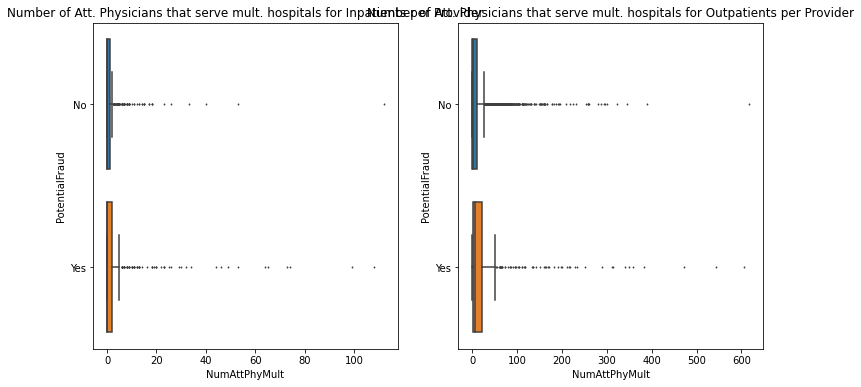

In [15]:
# Finding patterns of attending physicians who move around more than 1 hospitals (75% threshold)
nuniq_prov = train.groupby('AttendingPhysician')["Provider"].nunique().reset_index()
phy_more = nuniq_prov[nuniq_prov.Provider > 1].AttendingPhysician.tolist()

train.loc[train["AttendingPhysician"].isin(phy_more),"Att_Phy_Mult"] = 1
train.loc[~train["AttendingPhysician"].isin(phy_more),"Att_Phy_Mult"] = 0

num_attphy = transform_df('Att_Phy_Mult', 'sum', 'NumAttPhyMult')

create_boxplot(num_attphy, "NumAttPhyMult",
              "Number of Att. Physicians that serve mult. hospitals for Inpatients per Provider",
              "Number of Att. Physicians that serve mult. hospitals for Outpatients per Provider")

<b>Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize those patients who receive services from a lot of different hospitals?

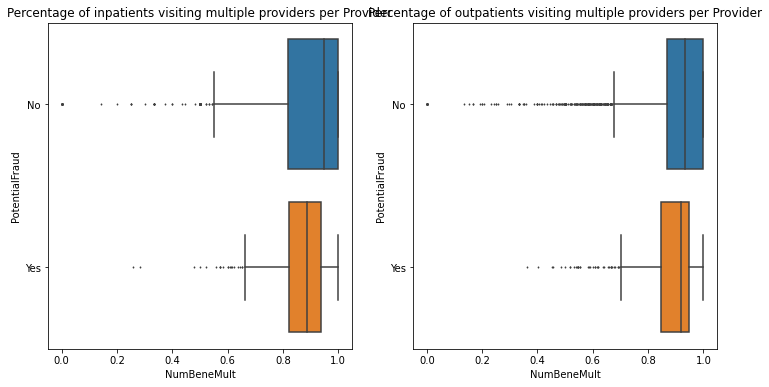

In [16]:
# Finding patterns of beneficiaries who move around to more than 1 hospitals
nuniq_prov = train.groupby('BeneID')["Provider"].nunique().reset_index()
bene_more = nuniq_prov[nuniq_prov.Provider > 1].BeneID.tolist()

train.loc[train["BeneID"].isin(bene_more),"Bene_Mult"] = 1
train.loc[~train["BeneID"].isin(bene_more),"Bene_Mult"] = 0

bene_mult_prov = transform_df('Bene_Mult', 'mean', 'NumBeneMult')

create_boxplot(bene_mult_prov, "NumBeneMult",
              "Percentage of inpatients visiting multiple providers per Provider",
              "Percentage of outpatients visiting multiple providers per Provider")

------------------------------------------------

### Study the relationship between the patient ages (at the time of their service) and the counts of medical claims.

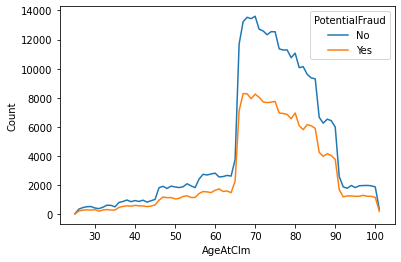

In [17]:
train["AgeAtClm"] = round((train["ClaimStartDt"] - train["DOB"]).dt.days/365,0).astype(int)

bene_age = train.groupby(['PotentialFraud','AgeAtClm'])[['ClaimID']].count()
bene_age.columns.values[0] = 'Count'
bene_age = bene_age.reset_index()

sns.lineplot(data = bene_age,x = "AgeAtClm", y = 'Count', hue='PotentialFraud');

### Study the relationship between the inpatient and outpatient patients.

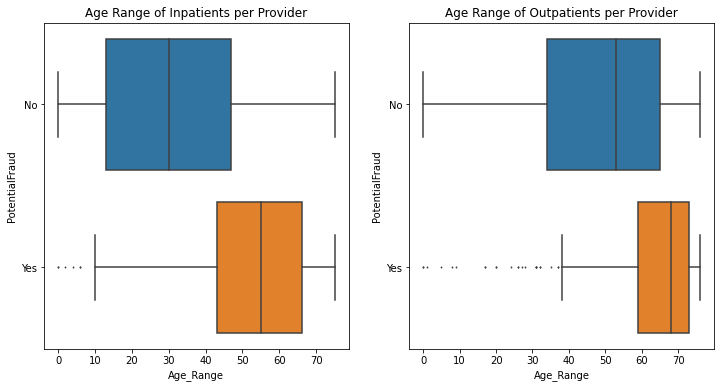

In [18]:
age_range = train.groupby(['PotentialFraud','IsOutpatient','Provider'])[['AgeAtClm']].max() -\
                            train.groupby(['PotentialFraud','IsOutpatient','Provider'])[['AgeAtClm']].min()
age_range.columns.values[0] = 'Age_Range'
age_range = age_range.reset_index()

create_boxplot(age_range, "Age_Range",
              "Age Range of Inpatients per Provider",
              "Age Range of Outpatients per Provider")

### Within the train-samples, do these show a definite chronic trend with respect to increasing ages?

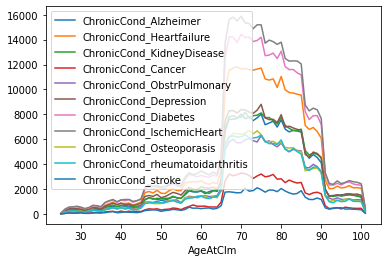

In [19]:
chronic = train.columns[train.columns.str.contains("Chronic")].tolist()

train.groupby('AgeAtClm')[chronic].sum().plot(kind = 'line');

------------

Based on the attribute ClaimStartDt, analyze the weekly service volume variations.

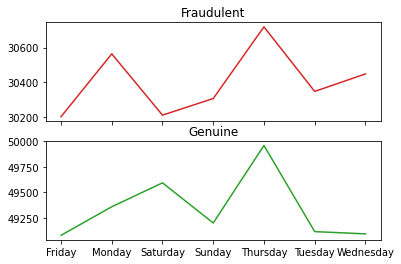

In [20]:
# create a new column representing the day of the week
train['ClaimStartDtDOW'] = train['ClaimStartDt'].dt.day_name()

fig, axs = plt.subplots(2)
axs[0].plot(train[fraudulent].groupby(['ClaimStartDtDOW'])['ClaimStartDtDOW'].count(), 'tab:red');
axs[0].set_title('Fraudulent')
axs[1].plot(train[genuine].groupby(['ClaimStartDtDOW'])['ClaimStartDtDOW'].count(), 'tab:green');
axs[1].set_title('Genuine')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

### For inpatients, is there any pattern between the admission durations and the type of chronic disease?

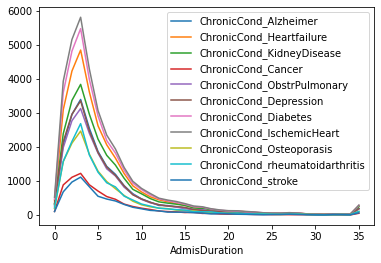

In [21]:
train["AdmisDuration"] = train["DischargeDt"] - train["AdmissionDt"]
train["AdmisDuration"] = train["AdmisDuration"].dt.days

train[train['IsOutpatient'] == 0].groupby('AdmisDuration')[chronic].sum().plot(kind= 'line');

-------

### Is there a trend in insurance covered percentages? InscClaimAmtReimbursed/(InscClaimAmtReimbursed+DeductibleAmtPaid).

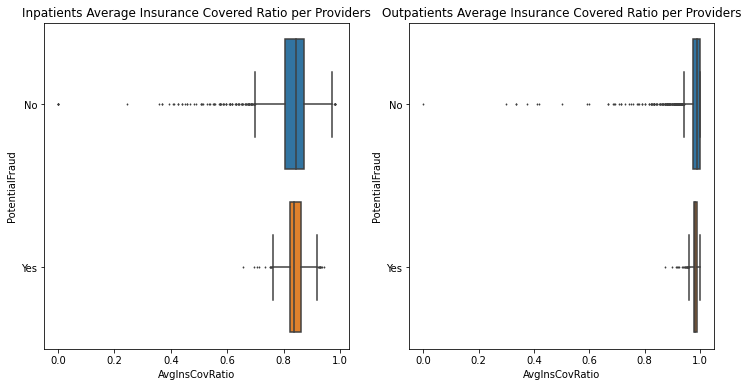

In [22]:
train['InsCovRatio'] = train['InscClaimAmtReimbursed']/(train['InscClaimAmtReimbursed'] + train["DeductibleAmtPaid"])

avg_inscov = transform_df('InsCovRatio', 'mean', 'AvgInsCovRatio')

create_boxplot(avg_inscov, "AvgInsCovRatio",
              "Inpatients Average Insurance Covered Ratio per Providers",
              "Outpatients Average Insurance Covered Ratio per Providers")

<b>How are the service durations related to the total claim amounts, i.e. InscClaimAmtReimbursed+DeductibleAmtPaid?

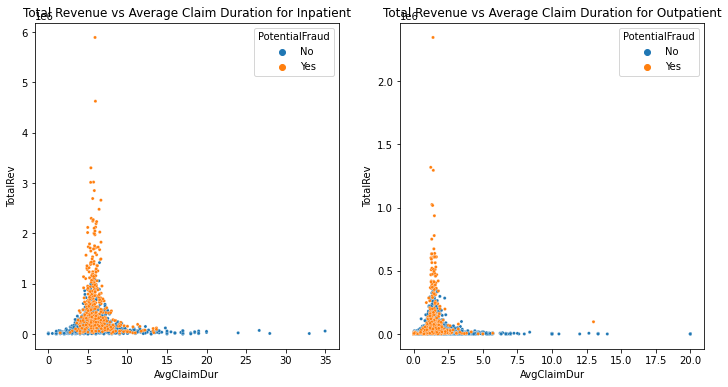

In [23]:
train["TotalRev"] = train['InscClaimAmtReimbursed'] + train['DeductibleAmtPaid']
train["ClaimDuration"] = train["ClaimEndDt"] - train["ClaimStartDt"]
train["ClaimDuration"] = train["ClaimDuration"].dt.days

dur_rev = train.groupby(['PotentialFraud','IsOutpatient','Provider'])[['TotalRev','ClaimDuration']].\
                agg({"TotalRev":'sum',"ClaimDuration": 'mean'})
dur_rev.columns.values[0] = 'TotalRev'
dur_rev.columns.values[1] = 'AvgClaimDur'
dur_rev = dur_rev.reset_index()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(data = dur_rev[dur_rev['IsOutpatient'] == 0], 
            x = "AvgClaimDur", y = 'TotalRev', hue = 'PotentialFraud', s = 10, ax = ax[0]);
sns.scatterplot(data = dur_rev[dur_rev['IsOutpatient'] == 1], 
            x = "AvgClaimDur", y = 'TotalRev', hue = 'PotentialFraud', s = 10, ax = ax[1]);
ax[0].set_title("Total Revenue vs Average Claim Duration for Inpatient");
ax[1].set_title("Total Revenue vs Average Claim Duration for Outpatient");

### Patient per Physician Ratio

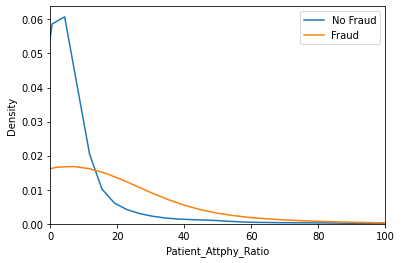

In [24]:
PP_Ratio = train.groupby(['PotentialFraud','Provider'])[[
            'BeneID','AttendingPhysician',
            'OperatingPhysician','OtherPhysician']].nunique().reset_index()
PP_Ratio['Patient_Attphy_Ratio'] = PP_Ratio['BeneID']/PP_Ratio['AttendingPhysician']
PP_Ratio['Patient_Operphy_Ratio'] = PP_Ratio['BeneID']/ PP_Ratio['OperatingPhysician']
PP_Ratio['Patient_Otherphy_Ratio'] = PP_Ratio['BeneID']/ PP_Ratio['OtherPhysician']

PP_Ratio.drop(['BeneID','AttendingPhysician','OperatingPhysician','OtherPhysician'],1,inplace = True)
PP_Ratio = PP_Ratio.apply(lambda x: np.where(x == np.inf,0, x))

sns.distplot(PP_Ratio.loc[PP_Ratio['PotentialFraud'] == 'No',
                         "Patient_Attphy_Ratio"], label='No Fraud', hist = False);
sns.distplot(PP_Ratio.loc[PP_Ratio['PotentialFraud'] == 'Yes',
                         "Patient_Attphy_Ratio"], label='Fraud', hist = False);
plt.legend();
plt.xlim(0,100);

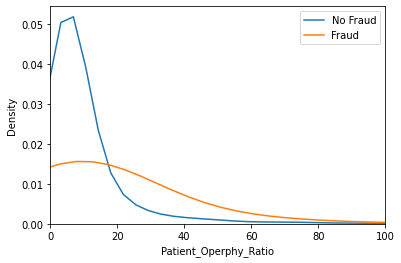

In [25]:
sns.distplot(PP_Ratio.loc[PP_Ratio['PotentialFraud'] == 'No',
                         "Patient_Operphy_Ratio"], label='No Fraud', hist = False);
sns.distplot(PP_Ratio.loc[PP_Ratio['PotentialFraud'] == 'Yes',
                         "Patient_Operphy_Ratio"], label='Fraud', hist = False);
plt.legend();
plt.xlim(0,100);

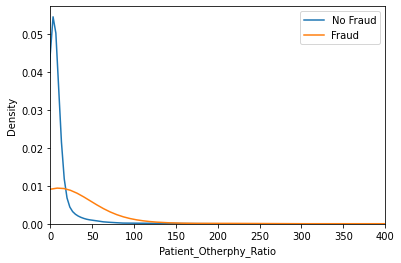

In [26]:
sns.distplot(PP_Ratio.loc[PP_Ratio['PotentialFraud'] == 'No',
                         "Patient_Otherphy_Ratio"], label='No Fraud', hist = False);
sns.distplot(PP_Ratio.loc[PP_Ratio['PotentialFraud'] == 'Yes',
                         "Patient_Otherphy_Ratio"], label='Fraud', hist = False);
plt.legend();
plt.xlim(0,400);

-----

<b> 
- An easier type of frauds is to submit duplicated claims using stolen patient IDs.
- While multiple claims with identical information are not always fraudulent, the prevalence of these duplicated records would signal potential fraud activities.
- Consider the various diagnosis codes, procedure codes, admit diagnosis codes as the key features, please identify the duplicated claims in the inpatients_train, outpatients_train data.

Where to look for frauds:
- potential hospital has a record of issuing fraudulent claims

<b>Are these potentially fradulent providers duplicating their own medical records, or are they using the records from the other providers?

In [27]:
# list of strings that contains all diagnosis and procedure columns
train['ClmDiagnosisCodeList'] = train[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
      'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
      'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
      'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
      'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']].values.tolist()
train["ClmDiagnosisCodeList"] = train["ClmDiagnosisCodeList"].apply(lambda x: [i for i in x if str(i) != "nan"])

train['ClmProcedureCodeList'] = train[['ClmProcedureCode_1', 'ClmProcedureCode_2',
      'ClmProcedureCode_3', 'ClmProcedureCode_4',
      'ClmProcedureCode_5', 'ClmProcedureCode_6']].values.tolist()
train["ClmProcedureCodeList"] = train["ClmProcedureCodeList"].apply(lambda x: [i for i in x if str(i) != "nan"])

for i in range(0,train.shape[0]):
    train['ClmDiagnosisCodeList'][i].sort()
    train['ClmProcedureCodeList'][i].sort()

# cost -> reimbursed + deductibles

# flag provider

# provider HAS DUPLICATES/FAKES!!

In [28]:
# now make a column with the super string
train['DiagnosisCodeBigString'] = train['ClmDiagnosisCodeList'].apply(lambda x: ''.join(x))
#train['ProceduresCodeBigString'] = train['ClmProcedureCodeList'].apply(lambda x: ''.join(x))

display(train['DiagnosisCodeBigString'].value_counts())
#display(train['ProceduresCodeBigString'].value_counts())

                                            10453
4019                                         3091
4011                                         2638
2724                                          936
185                                           902
                                            ...  
2724401944397840                                1
25000332041247794864965119585979902             1
300430514019492849390721078650E8889V4581        1
2138401973537354                                1
5859V4381                                       1
Name: DiagnosisCodeBigString, Length: 320911, dtype: int64

In [29]:
# make a boolean column for duplicates
train['isDuplicatedDiagnosis'] = train['DiagnosisCodeBigString'].duplicated(keep=False)
train

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,IsOutpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Att_Phy_Mult,Bene_Mult,AgeAtClm,ClaimStartDtDOW,AdmisDuration,InsCovRatio,TotalRev,ClaimDuration,ClmDiagnosisCodeList,ClmProcedureCodeList,DiagnosisCodeBigString,isDuplicatedDiagnosis
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,Yes,0.0,1.0,66,Sunday,6.0,0.960544,27068.0,6,"[1970, 19889, 2724, 2768, 4019, 5849, 5853, 71...",[],19701988927242768401958495853715907843,False
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,Yes,0.0,1.0,77,Sunday,NaN,1.000000,50.0,0,"[25002, 4280, 53081, 71848, 78079, 78959, 7990...",[],2500242805308171848780797895979902E8788V7183,False
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,0,1913-12-01,NaT,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,Yes,0.0,1.0,95,Tuesday,12.0,0.946781,20068.0,12,"[2639, 2753, 28489, 2948, 40390, 4240, 45821, ...","[5849.0, 7769.0]",26392753284892948403904240458215854E9305,False
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,0,1922-10-01,NaT,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,Yes,0.0,1.0,87,Saturday,18.0,0.940890,18068.0,18,"[4019, 4168, 43812, 72273, 73313, 7812, 78830,...",[9338.0],401941684381272273733137812788307993V5789,False
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,0,1930-07-01,NaT,0,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,Yes,0.0,1.0,79,Sunday,4.0,0.924083,14068.0,4,"[2449, 2768, 4019, 4240, 71535, 71960, V1202]",[8154.0],24492768401942407153571960V1202,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154147,CLM394122,2009-06-02,2009-06-04,PRV54050,500,PHY317497,NaN,PHY317497,NaT,NaN,0.0,NaT,NaN,71698,71941,7862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1925-01-01,NaT,0,1,0,23,400,12,12,0,0,0,0,0,0,0,1,1,0,0,0,0,890,120,No,0.0,1.0,84,Tuesday,NaN,1.000000,500.0,2,"[71698, 71941, 7862]",[],71698719417862,False
558207,BENE154687,CLM184358,2009-02-08,2009-02-08,PRV54302,3300,PHY376238,PHY376238

In [30]:
train[train['DiagnosisCodeBigString'] == '']

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,IsOutpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Att_Phy_Mult,Bene_Mult,AgeAtClm,ClaimStartDtDOW,AdmisDuration,InsCovRatio,TotalRev,ClaimDuration,ClmDiagnosisCodeList,ClmProcedureCodeList,DiagnosisCodeBigString,isDuplicatedDiagnosis
6,BENE25016,CLM372477,2009-05-22,2009-05-22,PRV55912,20,PHY416719,NaN,NaN,NaT,NaN,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1947-04-01,NaT,1,2,0,39,290,12,12,1,1,1,1,0,0,1,1,0,0,0,17000,2136,3810,40,Yes,0.0,1.0,62,Friday,NaN,1.000000,20.0,0,[],[],,True
84,BENE51066,CLM352455,2009-05-11,2009-05-11,PRV55912,50,PHY313559,NaN,PHY334706,NaT,NaN,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1914-04-01,NaT,0,1,0,39,100,12,12,1,0,0,1,0,0,1,1,0,1,0,8000,1068,990,550,Yes,0.0,1.0,95,Monday,NaN,1.000000,50.0,0,[],[],,True
130,BENE32891,CLM576854,2009-09-13,2009-09-13,PRV55907,30,PHY317758,NaN,PHY353943,NaT,NaN,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1943-08-01,NaT,0,1,0,39,770,12,12,1,1,0,0,1,1,1,1,0,0,0,4500,1068,790,1140,No,0.0,1.0,66,Sunday,NaN,1.000000,30.0,0,[],[],,True
229,BENE150444,CLM499012,2009-07-30,2009-07-30,PRV55907,50,PHY353601,NaN,PHY414750,NaT,NaN,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1924-04-01,NaT,0,1,1,39,730,12,12,1,1,1,0,1,0,1,1,0,0,0,10000,2136,1760,770,No,0.0,1.0,85,Thursday,NaN,1.000000,50.0,0,[],[],,True
264,BENE51679,CLM427323,2009-06-21,2009-06-21,PRV55907,50,PHY415764,NaN,NaN,NaT,45340,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1939-05-01,NaT,0,1,0,39,770,12,12,0,1,0,0,0,0,0,1,0,0,0,0,0,720,170,No,0.0,1.0,70,Sunday,NaN,1.000000,50.0,0,[],[],,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557884,BENE66099,CLM671901,2009-11-08,2009-11-08,PRV53174,20,PHY425704,PHY425704,NaN,NaT,NaN,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1940-12-01,NaT,0,3,0,17,120,12,12,0,0,0,1,0,1,1,0,1,0,0,0,0,110,20,No,0.0,1.0,69,Sunday,NaN,1.000000,20.0,0,[],[],,True
557921,BENE155886,CLM222874,2009-03-01,2009-03-01,PRV55871,50,PHY407548,NaN,NaN,NaT,99883,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1942-08-01,NaT,0,1,0,38,240,12,12,1,1,1,1,1,1,1,1,0,0,0,13450,2136,2410,390,No,0.0,0.0,67,Sunday,NaN,1.000000,50.0,0,[],[],,True
558005,BENE83715,CLM412914,2009-06-13,2009-06-13,PRV52232,70,PHY319434,NaN,NaN,NaT,V7612,40.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1930-10-01,NaT,0,1,0,10,50,12,12,0,0,0,0,0,0,1,1,1,0,0,0,0,730,170,No,1.0,1.0,79,Saturday,NaN,0.636364,110.0,0,[],[],,True
558034,BENE86807,CLM253926,2009-03-18,2009-03-18,PRV52757,50,PHY340638,NaN,NaN,NaT,NaN,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1929-07-01,NaT,0,1,0,14,870,12,12,0,

<b>Summarize the duplicate record counts/provider and study if the statistics have different distributions between honest and potentialfraud providers.

In [31]:
potFraud = pd.DataFrame(train[train['isDuplicatedDiagnosis'] == True].groupby('Provider', as_index=False).size())
potFraud.columns = ['Provider', 'DuplicatedCount']
honest = pd.DataFrame(train[train['isDuplicatedDiagnosis'] == False].groupby('Provider', as_index=False).size())
honest.columns = ['Provider', 'notDuplicatedCount']

potFraud.join(honest.set_index('Provider'), on='Provider')

,Provider,DuplicatedCount,notDuplicatedCount
0,PRV51001,13,12.0
1,PRV51003,35,97.0
2,PRV51004,80,69.0
3,PRV51005,607,558.0
4,PRV51007,33,39.0
...,...,...,...
4940,PRV57759,16,12.0
4941,PRV57760,14,8.0
4942,PRV57761,35,47.0
4943,PRV57762,1,NaN


<b>Do these potentially fraud providers reuse doctor IDs and/or patient IDs? If so, these fradulent IDs (or if the doctors or patients willingly participate) can be used as signals to the other types of fraudulent activities.

In [32]:
fraudulentProvBeneCount = train[train['isDuplicatedDiagnosis'] == True
     ].groupby(['Provider','BeneID'], as_index=False
              )['ClaimID'].count().sort_values(by='ClaimID', ascending=False)

fraudulentProvBeneCount.rename(columns={'ClaimID':'ClaimCount'}, inplace=True)

fraudulentProvDoctorCount = train[train['isDuplicatedDiagnosis'] == True
     ].groupby(['Provider','AttendingPhysician'], as_index=False
              )['ClaimID'].count().sort_values(by='ClaimID', ascending=False)

fraudulentProvDoctorCount.rename(columns={'ClaimID':'ClaimCount'}, inplace=True)

display(fraudulentProvBeneCount)
display(fraudulentProvDoctorCount)

,Provider,BeneID,ClaimCount
49890,PRV52420,BENE118316,19
324,PRV51005,BENE46215,18
125803,PRV55163,BENE49543,14
36387,PRV52064,BENE83219,13
61407,PRV52826,BENE51339,13
...,...,...,...
71784,PRV53326,BENE16120,1
71785,PRV53326,BENE20846,1
71788,PRV53326,BENE37079,1
71789,PRV53326,BENE40836,1


,Provider,AttendingPhysician,ClaimCount
24773,PRV53918,PHY330576,1281
5853,PRV51567,PHY350277,825
23648,PRV53797,PHY412132,680
4333,PRV51459,PHY423534,619
4328,PRV51459,PHY327046,601
...,...,...,...
24281,PRV53884,PHY315170,1
24282,PRV53884,PHY323887,1
24286,PRV53884,PHY336132,1
24287,PRV53884,PHY336325,1


<b>Do these duplicated records show any anomaly in terms of geographic locations? Even though the original data doesn't specify the providers nor the doctors' practice locations, one may use the majority of the patients' residence state/county information to infer their physical locations.

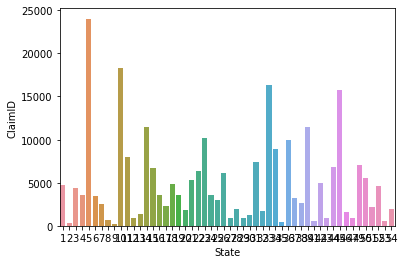

In [33]:
stateDuplicateClaimCount = train[train['isDuplicatedDiagnosis'] == True].groupby(
    ['State'], as_index=False)['ClaimID'].count()

sns.barplot(data = stateDuplicateClaimCount, x='State', y='ClaimID');

<b>Flag the providers

- Ratio of inpatients that receive both in/out patient service
- Ratio of outpatients that receive both in/out patient service
- Ratio of claims that didn't have any physician involved
- Ratio of inpatient claims with top 5 admtcode (from PotentialFraud)
- Ratio of outpatient claims with top 5 admtcode (from PotentialFraud)

In [34]:
train

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,IsOutpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Att_Phy_Mult,Bene_Mult,AgeAtClm,ClaimStartDtDOW,AdmisDuration,InsCovRatio,TotalRev,ClaimDuration,ClmDiagnosisCodeList,ClmProcedureCodeList,DiagnosisCodeBigString,isDuplicatedDiagnosis
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,Yes,0.0,1.0,66,Sunday,6.0,0.960544,27068.0,6,"[1970, 19889, 2724, 2768, 4019, 5849, 5853, 71...",[],19701988927242768401958495853715907843,False
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,Yes,0.0,1.0,77,Sunday,NaN,1.000000,50.0,0,"[25002, 4280, 53081, 71848, 78079, 78959, 7990...",[],2500242805308171848780797895979902E8788V7183,False
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,0,1913-12-01,NaT,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,Yes,0.0,1.0,95,Tuesday,12.0,0.946781,20068.0,12,"[2639, 2753, 28489, 2948, 40390, 4240, 45821, ...","[5849.0, 7769.0]",26392753284892948403904240458215854E9305,False
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,0,1922-10-01,NaT,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,Yes,0.0,1.0,87,Saturday,18.0,0.940890,18068.0,18,"[4019, 4168, 43812, 72273, 73313, 7812, 78830,...",[9338.0],401941684381272273733137812788307993V5789,False
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,0,1930-07-01,NaT,0,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,Yes,0.0,1.0,79,Sunday,4.0,0.924083,14068.0,4,"[2449, 2768, 4019, 4240, 71535, 71960, V1202]",[8154.0],24492768401942407153571960V1202,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154147,CLM394122,2009-06-02,2009-06-04,PRV54050,500,PHY317497,NaN,PHY317497,NaT,NaN,0.0,NaT,NaN,71698,71941,7862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1925-01-01,NaT,0,1,0,23,400,12,12,0,0,0,0,0,0,0,1,1,0,0,0,0,890,120,No,0.0,1.0,84,Tuesday,NaN,1.000000,500.0,2,"[71698, 71941, 7862]",[],71698719417862,False
558207,BENE154687,CLM184358,2009-02-08,2009-02-08,PRV54302,3300,PHY376238,PHY376238

In [35]:
# train.filter(regex='Physician')

# train['PhysicianExists'] = train['AttendingPhysician'] + train['OperatingPhysician'] +train['OtherPhysician'] 
# train

# apply(lambda x: [i for i in x if str(i) != "nan"])

# train[train['AttendingPhysician'].notna() | 
#       train['OperatingPhysician'].notna() | 
#       train['OperatingPhysician'].notna()]

condlist = [(train['AttendingPhysician'].notna()|train['OperatingPhysician'].notna()|train['OperatingPhysician'].notna())]
choicelist = ['1']

train['PhysicianExists'] = np.select(condlist, choicelist, default='0')

In [36]:
train[train['PhysicianExists'] == '1']

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,IsOutpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Att_Phy_Mult,Bene_Mult,AgeAtClm,ClaimStartDtDOW,AdmisDuration,InsCovRatio,TotalRev,ClaimDuration,ClmDiagnosisCodeList,ClmProcedureCodeList,DiagnosisCodeBigString,isDuplicatedDiagnosis,PhysicianExists
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,Yes,0.0,1.0,66,Sunday,6.0,0.960544,27068.0,6,"[1970, 19889, 2724, 2768, 4019, 5849, 5853, 71...",[],19701988927242768401958495853715907843,False,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,Yes,0.0,1.0,77,Sunday,NaN,1.000000,50.0,0,"[25002, 4280, 53081, 71848, 78079, 78959, 7990...",[],2500242805308171848780797895979902E8788V7183,False,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,0,1913-12-01,NaT,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,Yes,0.0,1.0,95,Tuesday,12.0,0.946781,20068.0,12,"[2639, 2753, 28489, 2948, 40390, 4240, 45821, ...","[5849.0, 7769.0]",26392753284892948403904240458215854E9305,False,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,0,1922-10-01,NaT,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,Yes,0.0,1.0,87,Saturday,18.0,0.940890,18068.0,18,"[4019, 4168, 43812, 72273, 73313, 7812, 78830,...",[9338.0],401941684381272273733137812788307993V5789,False,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,0,1930-07-01,NaT,0,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,Yes,0.0,1.0,79,Sunday,4.0,0.924083,14068.0,4,"[2449, 2768, 4019, 4240, 71535, 71960, V1202]",[8154.0],24492768401942407153571960V1202,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154147,CLM394122,2009-06-02,2009-06-04,PRV54050,500,PHY317497,NaN,PHY317497,NaT,NaN,0.0,NaT,NaN,71698,71941,7862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1925-01-01,NaT,0,1,0,23,400,12,12,0,0,0,0,0,0,0,1,1,0,0,0,0,890,120,No,0.0,1.0,84,Tuesday,NaN,1.000000,500.0,2,"[71698, 71941, 7862]",[],71698719417862,False,1
558207,BENE154687,CLM184358,2009-02-08,2009-02-08,P

In [37]:
train[train['AttendingPhysician'].notna()]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,IsOutpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Att_Phy_Mult,Bene_Mult,AgeAtClm,ClaimStartDtDOW,AdmisDuration,InsCovRatio,TotalRev,ClaimDuration,ClmDiagnosisCodeList,ClmProcedureCodeList,DiagnosisCodeBigString,isDuplicatedDiagnosis,PhysicianExists
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,Yes,0.0,1.0,66,Sunday,6.0,0.960544,27068.0,6,"[1970, 19889, 2724, 2768, 4019, 5849, 5853, 71...",[],19701988927242768401958495853715907843,False,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,Yes,0.0,1.0,77,Sunday,NaN,1.000000,50.0,0,"[25002, 4280, 53081, 71848, 78079, 78959, 7990...",[],2500242805308171848780797895979902E8788V7183,False,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,0,1913-12-01,NaT,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,Yes,0.0,1.0,95,Tuesday,12.0,0.946781,20068.0,12,"[2639, 2753, 28489, 2948, 40390, 4240, 45821, ...","[5849.0, 7769.0]",26392753284892948403904240458215854E9305,False,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,0,1922-10-01,NaT,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,Yes,0.0,1.0,87,Saturday,18.0,0.940890,18068.0,18,"[4019, 4168, 43812, 72273, 73313, 7812, 78830,...",[9338.0],401941684381272273733137812788307993V5789,False,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,0,1930-07-01,NaT,0,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,Yes,0.0,1.0,79,Sunday,4.0,0.924083,14068.0,4,"[2449, 2768, 4019, 4240, 71535, 71960, V1202]",[8154.0],24492768401942407153571960V1202,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154147,CLM394122,2009-06-02,2009-06-04,PRV54050,500,PHY317497,NaN,PHY317497,NaT,NaN,0.0,NaT,NaN,71698,71941,7862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1925-01-01,NaT,0,1,0,23,400,12,12,0,0,0,0,0,0,0,1,1,0,0,0,0,890,120,No,0.0,1.0,84,Tuesday,NaN,1.000000,500.0,2,"[71698, 71941, 7862]",[],71698719417862,False,1
558207,BENE154687,CLM184358,2009-02-08,2009-02-08,P

In [38]:
train.loc[(train['AttendingPhysician'].notna()) | 
          (train['OperatingPhysician'].notna())]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,IsOutpatient,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Att_Phy_Mult,Bene_Mult,AgeAtClm,ClaimStartDtDOW,AdmisDuration,InsCovRatio,TotalRev,ClaimDuration,ClmDiagnosisCodeList,ClmProcedureCodeList,DiagnosisCodeBigString,isDuplicatedDiagnosis,PhysicianExists
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,Yes,0.0,1.0,66,Sunday,6.0,0.960544,27068.0,6,"[1970, 19889, 2724, 2768, 4019, 5849, 5853, 71...",[],19701988927242768401958495853715907843,False,1
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,Yes,0.0,1.0,77,Sunday,NaN,1.000000,50.0,0,"[25002, 4280, 53081, 71848, 78079, 78959, 7990...",[],2500242805308171848780797895979902E8788V7183,False,1
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,0,1913-12-01,NaT,0,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,Yes,0.0,1.0,95,Tuesday,12.0,0.946781,20068.0,12,"[2639, 2753, 28489, 2948, 40390, 4240, 45821, ...","[5849.0, 7769.0]",26392753284892948403904240458215854E9305,False,1
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,0,1922-10-01,NaT,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,Yes,0.0,1.0,87,Saturday,18.0,0.940890,18068.0,18,"[4019, 4168, 43812, 72273, 73313, 7812, 78830,...",[9338.0],401941684381272273733137812788307993V5789,False,1
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,0,1930-07-01,NaT,0,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,Yes,0.0,1.0,79,Sunday,4.0,0.924083,14068.0,4,"[2449, 2768, 4019, 4240, 71535, 71960, V1202]",[8154.0],24492768401942407153571960V1202,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154147,CLM394122,2009-06-02,2009-06-04,PRV54050,500,PHY317497,NaN,PHY317497,NaT,NaN,0.0,NaT,NaN,71698,71941,7862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1925-01-01,NaT,0,1,0,23,400,12,12,0,0,0,0,0,0,0,1,1,0,0,0,0,890,120,No,0.0,1.0,84,Tuesday,NaN,1.000000,500.0,2,"[71698, 71941, 7862]",[],71698719417862,False,1
558207,BENE154687,CLM184358,2009-02-08,2009-02-08,P